In [7]:
import time
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from ultralytics import YOLO

# =======================================
# CONFIGURAÇÕES
# =======================================
DATASET_PATH = "../../LabelStudio/dataset/data.yaml"
IMAGE_SIZE = 640
EPOCHS = 3  # menos épocas só para medir
DEVICE = 0  # 0 = CUDA:0
RESULTS_DIR = Path("benchmark_batchsize")
RESULTS_DIR.mkdir(exist_ok=True)

# Modelo leve para benchmark
MODEL = "yolov5n.pt"

# Batch sizes para testar
BATCH_SIZES = [x for x in range(1, 65)]

# =======================================
# FUNÇÃO: Treinar e medir tempo + memória
# =======================================
def benchmark_batch(batch_size):
    model = YOLO(MODEL)
    torch.cuda.reset_peak_memory_stats()

    start = time.perf_counter_ns()
    results = model.train(
        data=DATASET_PATH,
        epochs=EPOCHS,
        imgsz=IMAGE_SIZE,
        batch=batch_size,
        workers=1,
        device=DEVICE,
        patience=2,
        save=False,
        pretrained=True
    )
    total_time = time.perf_counter_ns() - start
    time_per_epoch = total_time / EPOCHS

    # medir memória máxima alocada (em MB)
    max_mem = torch.cuda.max_memory_allocated(device=DEVICE) / (1024**2)

    return time_per_epoch, max_mem

In [8]:
# =======================================
# LOOP PRINCIPAL
# =======================================
results_list = []

for bs in BATCH_SIZES:
    print(f"\n=== Benchmarking batch size {bs} ===")
    time_per_epoch, max_mem = benchmark_batch(bs)

    results_list.append({
        "batch_size": bs,
        "time_per_epoch_ns": time_per_epoch,
        "max_memory_MB": max_mem
    })


=== Benchmarking batch size 1 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../../LabelStudio/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, 

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 229.037.5 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train21\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train21
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.412G      2.064      3.007      1.066         66        640: 100%|██████████| 505/505 [00:37<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:00<00:00, 25.73it/s]

                   all         49        725      0.718      0.719      0.791       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3     0.414G      1.693      1.651     0.9832         15        640: 100%|██████████| 505/505 [00:35<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:00<00:00, 26.96it/s]

                   all         49        725      0.828      0.782       0.87      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3     0.414G      1.578      1.383      0.964         11        640: 100%|██████████| 505/505 [00:36<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:00<00:00, 26.37it/s]

                   all         49        725      0.917      0.794      0.889      0.585



3 epochs completed in 0.031 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train21\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train21\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train21\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:00<00:00, 33.82it/s]


                   all         49        725      0.917      0.793      0.888      0.584
                Bullet         35        524      0.901      0.536      0.731      0.354
                 Enemy         46        153      0.951      0.863      0.948      0.703
                Player         48         48      0.899      0.979      0.985      0.696
Speed: 0.7ms preprocess, 6.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train21

=== Benchmarking batch size 2 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPE

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 238.239.9 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train23\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train23
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.717G      2.069      2.774      1.038         49        640: 100%|██████████| 253/253 [00:21<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, 20.80it/s]

                   all         49        725      0.935      0.605      0.826      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      0.77G      1.708      1.506     0.9657         13        640: 100%|██████████| 253/253 [00:20<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, 21.15it/s]

                   all         49        725      0.877      0.756      0.874      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      0.77G      1.554      1.257     0.9364         37        640: 100%|██████████| 253/253 [00:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, 22.20it/s]

                   all         49        725      0.869      0.796      0.881      0.587



3 epochs completed in 0.018 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train23\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train23\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train23\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:00<00:00, 18.59it/s]


                   all         49        725       0.87      0.795      0.881      0.587
                Bullet         35        524      0.892      0.462      0.695       0.36
                 Enemy         46        153      0.805      0.943      0.961       0.72
                Player         48         48      0.913      0.979      0.986      0.681
Speed: 0.9ms preprocess, 6.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train23

=== Benchmarking batch size 3 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPE

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 249.633.5 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train24\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0004921875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train24
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.05G      2.017      2.754      1.024         51        640: 100%|██████████| 169/169 [00:15<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 17.22it/s]

                   all         49        725      0.802      0.752      0.821      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3       1.2G      1.633      1.398     0.9493         12        640: 100%|██████████| 169/169 [00:15<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 17.56it/s]

                   all         49        725      0.876      0.785      0.891      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3       1.2G      1.489      1.205     0.9248         22        640: 100%|██████████| 169/169 [00:15<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 17.60it/s]

                   all         49        725      0.933      0.789        0.9      0.592



3 epochs completed in 0.014 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train24\weights\last.pt, 5.2MB

=== Benchmarking batch size 4 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../../LabelStudio/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dro

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 253.039.9 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train25\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train25
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.26G      2.043       2.74      1.018         50        640: 100%|██████████| 127/127 [00:13<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.78it/s]

                   all         49        725      0.875      0.687      0.818      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      1.38G      1.663      1.401     0.9595         11        640: 100%|██████████| 127/127 [00:12<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.01it/s]

                   all         49        725      0.894       0.73      0.875      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      1.38G       1.56      1.235     0.9265         18        640: 100%|██████████| 127/127 [00:13<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.76it/s]

                   all         49        725      0.872       0.78      0.882      0.599



3 epochs completed in 0.012 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train25\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train25\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train25\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]


                   all         49        725      0.873      0.781      0.882      0.598
                Bullet         35        524      0.944      0.417        0.7      0.355
                 Enemy         46        153      0.822      0.948       0.96      0.734
                Player         48         48      0.853      0.979      0.984      0.706
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train25

=== Benchmarking batch size 5 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPE

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 206.853.7 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train26\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005078125), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train26
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.54G      2.083      2.824      1.029        122        640: 100%|██████████| 101/101 [00:11<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.35it/s]

                   all         49        725      0.763      0.529      0.701      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      1.54G      1.656      1.426     0.9438        174        640: 100%|██████████| 101/101 [00:11<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.08it/s]

                   all         49        725      0.839      0.791      0.879      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      1.78G      1.496      1.213      0.925         75        640: 100%|██████████| 101/101 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.79it/s]

                   all         49        725      0.922      0.811      0.905      0.605



3 epochs completed in 0.010 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train26\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train26\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train26\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]


                   all         49        725      0.922      0.811      0.905      0.606
                Bullet         35        524      0.965      0.519      0.762      0.392
                 Enemy         46        153      0.841      0.935      0.965      0.741
                Player         48         48      0.959      0.979      0.989      0.684
Speed: 1.0ms preprocess, 3.0ms inference, 0.0ms loss, 9.9ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train26

=== Benchmarking batch size 6 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPE

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 233.746.9 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train27\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.000515625), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train27
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.99G      2.066      2.846      1.027         53        640: 100%|██████████| 85/85 [00:11<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.37it/s]

                   all         49        725      0.875      0.526       0.74      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      2.22G      1.621      1.381     0.9484         11        640: 100%|██████████| 85/85 [00:11<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.30it/s]

                   all         49        725      0.861      0.742      0.874      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      2.23G      1.483      1.166     0.9239         11        640: 100%|██████████| 85/85 [00:10<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.50it/s]

                   all         49        725      0.905      0.803        0.9       0.61



3 epochs completed in 0.010 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train27\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train27\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train27\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]


                   all         49        725      0.905      0.803        0.9      0.609
                Bullet         35        524      0.931      0.488      0.742      0.374
                 Enemy         46        153      0.868      0.943      0.969      0.741
                Player         48         48      0.918      0.979       0.99      0.713
Speed: 1.1ms preprocess, 2.9ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train27

=== Benchmarking batch size 7 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 252.138.4 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train28\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0004921875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train28
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.09G       2.08      2.926      1.034         58        640: 100%|██████████| 73/73 [00:11<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.57it/s]

                   all         49        725      0.871      0.257      0.566      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      2.09G      1.625      1.404     0.9447         11        640: 100%|██████████| 73/73 [00:10<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.89it/s]

                   all         49        725      0.871       0.75      0.867      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      2.09G      1.488       1.16     0.9208         12        640: 100%|██████████| 73/73 [00:10<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.79it/s]

                   all         49        725      0.904      0.814      0.894      0.604



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train28\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train28\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train28\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]


                   all         49        725      0.903      0.815      0.894      0.605
                Bullet         35        524      0.892      0.519      0.722      0.375
                 Enemy         46        153      0.858      0.928      0.966       0.75
                Player         48         48       0.96      0.998      0.994       0.69
Speed: 1.0ms preprocess, 3.5ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train28

=== Benchmarking batch size 8 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 220.743.6 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train29\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train29
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.55G      2.093      2.936      1.038         65        640: 100%|██████████| 64/64 [00:10<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.50it/s]

                   all         49        725      0.796      0.207       0.56      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      2.55G      1.658      1.392     0.9544         14        640: 100%|██████████| 64/64 [00:09<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.21it/s]

                   all         49        725      0.881      0.749      0.862      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      2.55G      1.491      1.157     0.9284         12        640: 100%|██████████| 64/64 [00:09<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.59it/s]

                   all         49        725      0.919       0.79      0.892      0.585



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train29\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train29\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train29\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]


                   all         49        725      0.922      0.788      0.892      0.584
                Bullet         35        524      0.916      0.473      0.721      0.365
                 Enemy         46        153      0.875      0.913      0.963      0.723
                Player         48         48      0.977      0.979      0.993      0.665
Speed: 1.0ms preprocess, 4.1ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train29

=== Benchmarking batch size 9 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPE

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 255.339.0 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train30\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0004921875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train30
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.06G      2.111      3.002      1.034         52        640: 100%|██████████| 57/57 [00:10<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]

                   all         49        725      0.984      0.089      0.432      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      2.88G      1.645      1.425     0.9513         17        640: 100%|██████████| 57/57 [00:09<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.62it/s]

                   all         49        725      0.912        0.7      0.861      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      3.47G        1.5      1.203     0.9215         10        640: 100%|██████████| 57/57 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all         49        725      0.901      0.799      0.894      0.593



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train30\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train30\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train30\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]


                   all         49        725      0.902      0.799      0.895      0.592
                Bullet         35        524      0.939      0.468      0.725      0.372
                 Enemy         46        153      0.849      0.928      0.966      0.717
                Player         48         48      0.918          1      0.993      0.688
Speed: 1.0ms preprocess, 2.8ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train30

=== Benchmarking batch size 10 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SU

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 254.230.9 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train31\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00046875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train31
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.41G      2.115      3.017      1.035        111        640: 100%|██████████| 51/51 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.43it/s]

                   all         49        725      0.671      0.419      0.403      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3       2.9G      1.648      1.425     0.9475        158        640: 100%|██████████| 51/51 [00:09<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all         49        725      0.929      0.674      0.853      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3       2.9G      1.531      1.209     0.9233         75        640: 100%|██████████| 51/51 [00:09<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all         49        725      0.894      0.798      0.888      0.585



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train31\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train31\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train31\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]


                   all         49        725      0.894      0.795      0.888      0.585
                Bullet         35        524      0.869       0.49      0.709      0.343
                 Enemy         46        153      0.898      0.917      0.965      0.728
                Player         48         48      0.917      0.979      0.991      0.684
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train31

=== Benchmarking batch size 11 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 252.233.9 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train33\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.000515625), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train33
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.48G      2.109      3.066       1.04        224        640: 100%|██████████| 46/46 [00:10<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]

                   all         49        725      0.488      0.418      0.374      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      3.17G      1.647      1.453     0.9462        381        640: 100%|██████████| 46/46 [00:09<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]

                   all         49        725      0.949      0.556      0.819      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      2.98G      1.527      1.196     0.9266        364        640: 100%|██████████| 46/46 [00:09<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all         49        725      0.907      0.802      0.882       0.59



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train33\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train33\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train33\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


                   all         49        725      0.907      0.802      0.881       0.59
                Bullet         35        524      0.864      0.525      0.695      0.345
                 Enemy         46        153      0.859      0.928      0.964      0.739
                Player         48         48          1      0.952      0.985      0.685
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train33

=== Benchmarking batch size 12 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 198.170.3 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train34\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00046875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train34
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.69G      2.166      3.114       1.04        157        640: 100%|██████████| 43/43 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all         49        725      0.579      0.549      0.388      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      3.67G      1.652      1.446     0.9441         11        640: 100%|██████████| 43/43 [00:10<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.03it/s]

                   all         49        725      0.989      0.495      0.834      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      3.69G       1.49       1.19      0.919         18        640: 100%|██████████| 43/43 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.28it/s]

                   all         49        725      0.893      0.772      0.886      0.592



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train34\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train34\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train34\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


                   all         49        725      0.893      0.772      0.887      0.592
                Bullet         35        524      0.923      0.409      0.717      0.362
                 Enemy         46        153       0.81      0.928       0.96      0.703
                Player         48         48      0.948      0.979      0.983      0.711
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train34

=== Benchmarking batch size 13 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 170.282.3 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train35\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005078125), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train35
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.93G      2.134      3.122      1.033        173        640: 100%|██████████| 39/39 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         49        725     0.0151       0.66      0.329      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      3.89G      1.664      1.474     0.9444        372        640: 100%|██████████| 39/39 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         49        725      0.991      0.294      0.803      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      3.84G      1.517      1.206     0.9236        426        640: 100%|██████████| 39/39 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         49        725      0.934      0.713      0.863      0.569



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train35\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train35\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train35\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


                   all         49        725      0.934      0.712      0.863      0.569
                Bullet         35        524      0.907      0.297       0.65      0.299
                 Enemy         46        153      0.909      0.902      0.952      0.701
                Player         48         48      0.987      0.938      0.988      0.707
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train35

=== Benchmarking batch size 14 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 264.032.3 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train36\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.000546875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train36
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       4.1G      2.152      3.158      1.044         35        640: 100%|██████████| 37/37 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         49        725     0.0173       0.67      0.296      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      4.03G      1.722      1.528     0.9569         14        640: 100%|██████████| 37/37 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         49        725      0.983      0.274      0.806      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      4.12G      1.549      1.228     0.9266         11        640: 100%|██████████| 37/37 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         49        725      0.936      0.745      0.878      0.581



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train36\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train36\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train36\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         49        725      0.936      0.745      0.878      0.581
                Bullet         35        524      0.951      0.368      0.691      0.353
                 Enemy         46        153      0.936      0.908      0.957       0.69
                Player         48         48       0.92      0.959      0.985        0.7
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train36

=== Benchmarking batch size 15 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 246.835.0 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train37\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00046875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train37
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.25G      2.126      3.182       1.04        296        640: 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         49        725     0.0132       0.62      0.281      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      4.17G      1.661      1.487     0.9437        352        640: 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         49        725          1      0.191      0.793      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      4.27G      1.493      1.199     0.9194        314        640: 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         49        725      0.958      0.705      0.877      0.586



3 epochs completed in 0.009 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train37\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train37\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train37\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         49        725      0.959      0.705      0.877      0.586
                Bullet         35        524      0.929      0.342      0.691       0.36
                 Enemy         46        153      0.948      0.828      0.953      0.713
                Player         48         48          1      0.947      0.988      0.687
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train37

=== Benchmarking batch size 16 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 244.316.4 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train38\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train38
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.05G      2.174      3.208      1.046        217        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         49        725     0.0147      0.518      0.212       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      4.59G       1.68       1.52     0.9454        342        640: 100%|██████████| 32/32 [00:13<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         49        725          1       0.22      0.765      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      4.48G      1.499      1.203     0.9234        274        640: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         49        725      0.966      0.659      0.885      0.587



3 epochs completed in 0.015 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train38\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train38\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train38\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


                   all         49        725      0.966      0.659      0.886      0.587
                Bullet         35        524       0.95       0.29      0.701       0.37
                 Enemy         46        153      0.949      0.869      0.972      0.708
                Player         48         48          1      0.818      0.983      0.683
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train38

=== Benchmarking batch size 17 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 239.533.4 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train39\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00053125), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train39
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.44G      2.177      3.249      1.051        183        640: 100%|██████████| 30/30 [00:22<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         49        725     0.0124       0.54      0.168     0.0762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      5.54G      1.664      1.517     0.9451        579        640: 100%|██████████| 30/30 [00:30<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         49        725      0.993      0.198      0.634       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      4.96G      1.513      1.192     0.9176        465        640: 100%|██████████| 30/30 [00:25<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         49        725      0.988       0.53      0.847      0.546



3 epochs completed in 0.023 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train39\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train39\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train39\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


                   all         49        725      0.988      0.529      0.847      0.546
                Bullet         35        524      0.964     0.0512      0.605      0.293
                 Enemy         46        153          1      0.688      0.956      0.696
                Player         48         48          1      0.849      0.981      0.649
Speed: 0.4ms preprocess, 11.8ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train39

=== Benchmarking batch size 18 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SU

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 236.869.4 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train40\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005625000000000001), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train40
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.26G       2.19      3.275      1.051         66        640: 100%|██████████| 29/29 [00:14<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         49        725     0.0107       0.41      0.194      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      5.25G      1.687       1.53     0.9462         19        640: 100%|██████████| 29/29 [00:14<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         49        725      0.834      0.647      0.696      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3       5.2G      1.518      1.244     0.9302         11        640: 100%|██████████| 29/29 [00:13<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         49        725       0.99      0.409      0.839      0.554



3 epochs completed in 0.012 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train40\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train40\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train40\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


                   all         49        725      0.989      0.408       0.84      0.554
                Bullet         35        524      0.968     0.0584      0.587      0.295
                 Enemy         46        153          1      0.655      0.959      0.699
                Player         48         48          1      0.511      0.974      0.669
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train40

=== Benchmarking batch size 19 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 257.953.7 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train41\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00044531249999999996), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train41
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.28G      2.171      3.329      1.054        336        640: 100%|██████████| 27/27 [00:15<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         49        725     0.0116      0.492      0.237      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      5.21G      1.699      1.558     0.9451        346        640: 100%|██████████| 27/27 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         49        725      0.026      0.729      0.637       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      5.52G      1.521      1.206     0.9246        306        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         49        725      0.996      0.423      0.844      0.545



3 epochs completed in 0.014 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train41\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train41\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train41\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]


                   all         49        725      0.996      0.423      0.844      0.545
                Bullet         35        524          1     0.0141      0.604      0.302
                 Enemy         46        153      0.989      0.599      0.962      0.705
                Player         48         48          1      0.654      0.965      0.628
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train41

=== Benchmarking batch size 20 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 237.134.2 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train42\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00046875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train42
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.53G      2.171      3.359      1.051        117        640: 100%|██████████| 26/26 [00:20<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         49        725      0.012      0.556      0.264      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      5.31G      1.677      1.565     0.9473        155        640: 100%|██████████| 26/26 [00:15<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         49        725     0.0266      0.736      0.622      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      5.38G      1.525      1.232     0.9251         63        640: 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         49        725      0.996      0.288      0.824      0.533



3 epochs completed in 0.015 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train42\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train42\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train42\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


                   all         49        725      0.996      0.288      0.825      0.534
                Bullet         35        524          1     0.0113      0.545      0.258
                 Enemy         46        153      0.988      0.548      0.959      0.707
                Player         48         48          1      0.306       0.97      0.635
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train42

=== Benchmarking batch size 21 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 242.660.0 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train43\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0004921875), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train43
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.95G      2.215      3.432      1.062         37        640: 100%|██████████| 25/25 [00:31<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         49        725      0.012      0.526      0.197      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      5.92G      1.693       1.58     0.9483         20        640: 100%|██████████| 25/25 [00:27<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         49        725     0.0265      0.713      0.554      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      5.86G       1.62      1.882     0.9663          1        640: 100%|██████████| 25/25 [00:24<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         49        725      0.965      0.578      0.805      0.501



3 epochs completed in 0.024 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train43\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train43\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train43\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


                   all         49        725      0.965      0.578      0.805      0.501
                Bullet         35        524      0.986      0.136      0.522      0.273
                 Enemy         46        153      0.921      0.869      0.948      0.665
                Player         48         48      0.988      0.729      0.946      0.564
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train43

=== Benchmarking batch size 22 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 250.340.5 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train44\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.000515625), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train44
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      6.92G      2.213       3.53      1.067        593        640: 100%|██████████| 23/23 [00:44<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         49        725     0.0118      0.498      0.145     0.0459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      7.25G      1.692      1.574     0.9429        507        640: 100%|██████████| 23/23 [00:38<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         49        725     0.0233      0.722      0.539      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      5.83G      1.515      1.246     0.9175        562        640: 100%|██████████| 23/23 [00:35<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         49        725      0.033      0.824      0.777      0.517



3 epochs completed in 0.034 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train44\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train44\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train44\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]


                   all         49        725      0.033      0.824      0.776      0.516
                Bullet         35        524     0.0439      0.525      0.429       0.23
                 Enemy         46        153     0.0462      0.967      0.939      0.699
                Player         48         48    0.00898      0.979      0.961       0.62
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train44

=== Benchmarking batch size 23 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 236.136.4 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train45\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005390625), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train45
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      5.89G      2.232      3.616      1.076        589        640: 100%|██████████| 22/22 [00:42<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         49        725     0.0096      0.406     0.0779     0.0178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      6.73G      1.693       1.58     0.9429        764        640: 100%|██████████| 22/22 [00:46<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         49        725     0.0213      0.654      0.414      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      5.92G      1.523      1.239     0.9188        608        640: 100%|██████████| 22/22 [00:41<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         49        725     0.0325      0.836       0.78      0.507



3 epochs completed in 0.037 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train45\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train45\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train45\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]


                   all         49        725     0.0325      0.836      0.781      0.507
                Bullet         35        524     0.0457      0.563       0.44      0.241
                 Enemy         46        153     0.0417      0.967      0.945      0.693
                Player         48         48       0.01      0.979      0.957      0.587
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train45

=== Benchmarking batch size 24 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 241.337.8 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train46\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005625000000000001), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train46
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      6.22G      2.236      3.612      1.067         68        640: 100%|██████████| 22/22 [00:52<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         49        725    0.00992       0.39     0.0706     0.0205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      6.77G      1.708      1.626     0.9419         18        640: 100%|██████████| 22/22 [00:47<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         49        725     0.0249      0.629      0.445      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      6.44G      1.563      1.351     0.9555          2        640: 100%|██████████| 22/22 [00:45<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         49        725     0.0342      0.841      0.788      0.532



3 epochs completed in 0.041 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train46\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train46\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train46\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]


                   all         49        725     0.0342      0.842      0.788      0.532
                Bullet         35        524     0.0437      0.586      0.479      0.257
                 Enemy         46        153      0.049      0.961      0.934      0.691
                Player         48         48     0.0101      0.979      0.951      0.648
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train46

=== Benchmarking batch size 25 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 246.522.1 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train47\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005859375000000001), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train47
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      6.33G      2.221      3.666      1.078        255        640: 100%|██████████| 21/21 [00:49<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         49        725    0.00967      0.364     0.0824      0.034

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        2/3      6.87G      1.704      1.593     0.9414        197        640: 100%|██████████| 21/21 [01:09<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         49        725     0.0223      0.713        0.4      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      6.34G      1.504      1.224     0.9218         90        640: 100%|██████████| 21/21 [01:04<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         49        725     0.0317      0.836      0.771      0.506



3 epochs completed in 0.052 hours.
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train47\weights\last.pt, 5.2MB
Optimizer stripped from c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train47\weights\best.pt, 5.2MB

Validating c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train47\weights\best.pt...
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5n summary (fused): 84 layers, 2,503,529 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


                   all         49        725     0.0317      0.836      0.772      0.506
                Bullet         35        524     0.0515       0.55      0.404      0.216
                 Enemy         46        153     0.0332       0.98       0.94      0.674
                Player         48         48     0.0102      0.979       0.97      0.628
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train47

=== Benchmarking batch size 26 ===
PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.202 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUP

train: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\train\labels.cache... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 238.755.6 MB/s, size: 25.4 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train48\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.00040625000000000004), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\train48
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      6.66G      2.378      4.399      1.175        722        640:  50%|█████     | 10/20 [00:39<00:39,  3.92s/it]


KeyboardInterrupt: 

In [9]:
# =======================================
# AGRUPAR RESULTADOS
# =======================================
df = pd.DataFrame(results_list)
print("\nResultados brutos:")
print(df)

# salvar parquet
df.to_parquet(RESULTS_DIR / "yolov5_batchsize.parquet", index=False)


Resultados brutos:
    batch_size  time_per_epoch_ns  max_memory_MB
0            1       4.111403e+10     379.630859
1            2       2.550289e+10     599.884277
2            3       1.869839e+10     836.625000
3            4       1.739183e+10    1121.714844
4            5       1.579805e+10    1317.850586
5            6       1.522651e+10    1695.907227
6            7       1.595303e+10    1771.418457
7            8       1.447943e+10    1996.020996
8            9       1.621322e+10    2447.540527
9           10       1.402506e+10    2495.344727
10          11       1.410068e+10    2715.883301
11          12       1.489055e+10    2903.311523
12          13       1.419309e+10    3249.715332
13          14       1.442966e+10    3353.906738
14          15       1.460644e+10    3642.287598
15          16       2.113056e+10    4251.393555
16          17       3.159372e+10    4587.279297
17          18       1.924624e+10    4238.745117
18          19       2.026195e+10    4522.575684


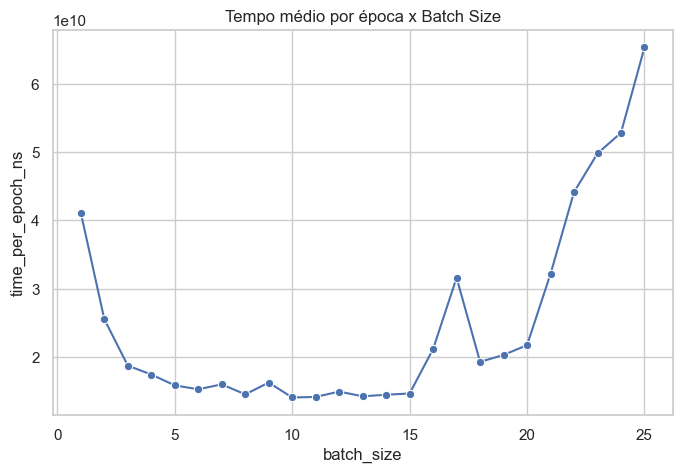

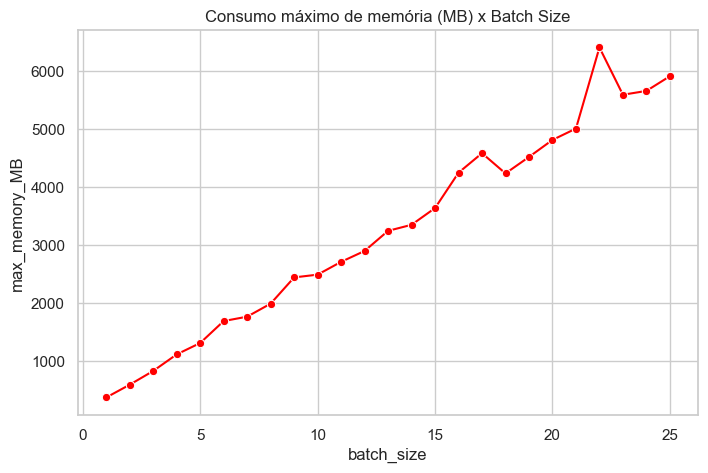

In [10]:
# =======================================
# PLOTS
# =======================================
%matplotlib inline
sns.set(style="whitegrid")

# Tempo por época
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="batch_size", y="time_per_epoch_ns", marker="o")
plt.title("Tempo médio por época x Batch Size")
plt.show()

# Memória GPU
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="batch_size", y="max_memory_MB", marker="o", color="red")
plt.title("Consumo máximo de memória (MB) x Batch Size")
plt.show()
